<a href="https://colab.research.google.com/github/hxri/Deep-Learning-Lab/blob/main/Experiment_4_KMeans_PCA_LDA_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

In [1]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = df[['SepalLengthCm','PetalLengthCm','PetalLengthCm','PetalWidthCm']].values

In [ ]:
pca = PCA(n_components=2)
data = pca.fit_transform(X)

In [ ]:
data

array([[-3.55269786e+00, -2.33419057e-01],
       [-3.60721064e+00, -4.26490300e-02],
       [-3.79220764e+00,  1.16725555e-01],
       [-3.55849559e+00,  2.74901452e-01],
       [-3.57995425e+00, -1.38034043e-01],
       [-3.02492245e+00, -3.84947083e-01],
       [-3.66170301e+00,  2.63726355e-01],
       [-3.44947004e+00, -1.06638602e-01],
       [-3.74349259e+00,  4.34276037e-01],
       [-3.50400322e+00, -3.14739331e-02],
       [-3.34044448e+00, -4.88178656e-01],
       [-3.37349860e+00,  1.15526867e-01],
       [-3.66174383e+00,  3.25156387e-02],
       [-4.18947843e+00,  4.15254381e-01],
       [-3.62287158e+00, -9.63905034e-01],
       [-3.20412172e+00, -7.33893006e-01],
       [-3.54685932e+00, -5.10528849e-01],
       [-3.52542107e+00, -2.13198712e-01],
       [-2.97043008e+00, -6.91322468e-01],
       [-3.39493685e+00, -1.81803271e-01],
       [-3.07947604e+00, -4.25387773e-01],
       [-3.36766005e+00, -1.61582926e-01],
       [-4.21091668e+00,  1.17924244e-01],
       [-3.

In [ ]:
print(pca.components_)

[[ 0.27256389  0.65242109  0.65242109  0.27276796]
 [-0.95385013  0.15697721  0.15697721  0.20220345]]


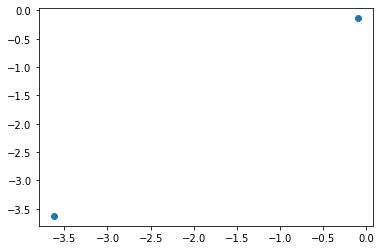

In [30]:
import matplotlib.pyplot as plt
plt.scatter(data[0], data[1])

In [ ]:
data.shape

(150, 2)

In [ ]:
new_df = pd.DataFrame(data, columns=['pc1','pc2'])

In [ ]:
new_df

,pc1,pc2
0,-3.552698,-0.233419
1,-3.607211,-0.042649
2,-3.792208,0.116726
3,-3.558496,0.274901
4,-3.579954,-0.138034
...,...,...
145,2.414617,-0.141925
146,1.935516,0.095943
147,2.278274,-0.011816
148,2.539304,0.397791


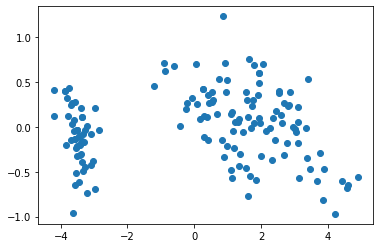

In [ ]:
plt.scatter(new_df['pc1'], new_df['pc2'])

# K Means - Sklearn Data

In [2]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(new_df.values)

In [ ]:
lb = kmeans.labels_

In [ ]:
lb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
centers

array([[-3.34249347, -0.0745584 ],
       [ 1.82631087,  0.04073809]])

In [ ]:
out = kmeans.fit_transform(new_df.values)

In [ ]:
final_df = pd.DataFrame(out)

In [ ]:
final_df

,0,1
0,0.263482,5.385991
1,0.266633,5.434161
2,0.488705,5.619032
3,0.410827,5.389895
4,0.245798,5.409220
...,...,...
145,5.757505,0.616012
146,5.280763,0.122366
147,5.621118,0.455009
148,5.900733,0.797399


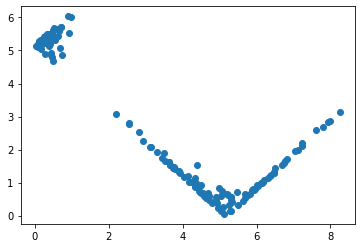

In [ ]:
plt.scatter(final_df[0], final_df[1])

In [ ]:
pds = kmeans.predict(new_df.values)

In [ ]:
pds.shape

(150,)

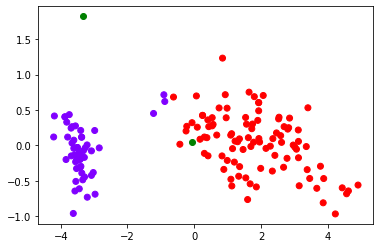

In [ ]:
plt.scatter(centers[0], centers[1], color='green')
plt.scatter(new_df['pc1'], new_df['pc2'], c=lb, cmap='rainbow')

# Kaggle Data

In [3]:
!wget https://raw.githubusercontent.com/hxri/Deep-Learning-Lab/main/Datasets/bank.csv

--2022-05-12 09:11:34--  https://raw.githubusercontent.com/hxri/Deep-Learning-Lab/main/Datasets/bank.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 918960 (897K) [text/plain]
Saving to: ‘bank.csv’

bank.csv            100%[===================>] 897.42K  --.-KB/s    in 0.03s   

2022-05-12 09:11:35 (30.6 MB/s) - ‘bank.csv’ saved [918960/918960]



In [4]:
df = pd.read_csv('/content/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [5]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df = df.apply(le.fit_transform)

In [6]:
X=df.drop(['deposit', 'age', 'balance', 'day', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous'],axis=1)
y=df['deposit']

In [7]:
X

,job,marital,education,default,housing,loan,contact,poutcome
0,0,1,1,0,1,0,2,3
1,0,1,1,0,0,0,2,3
2,9,1,1,0,1,0,2,3
3,7,1,1,0,1,0,2,3
4,0,1,2,0,0,0,2,3
...,...,...,...,...,...,...,...,...
11157,1,2,0,0,1,0,0,3
11158,7,1,1,0,0,0,2,3
11159,9,2,1,0,0,0,0,3
11160,9,1,1,0,0,1,0,0


In [16]:
X[:100].shape

(100, 8)

In [23]:
pca = PCA(n_components=2)
data = pca.fit_transform(X[:100])

In [24]:
data

array([[-3.62222732, -0.09567138],
       [-3.62540726, -0.14036658],
       [ 5.35660247,  0.51223991],
       [ 3.36130696,  0.37714851],
       [-3.56979871, -1.00961805],
       [ 0.47082462, -1.19715003],
       [ 0.43168948, -0.70968916],
       [ 1.32687631,  0.72951798],
       [ 5.35660247,  0.51223991],
       [ 3.40044211, -0.11031236],
       [-3.58309218, -0.58313225],
       [-2.62457957, -0.02812568],
       [ 0.43168948, -0.70968916],
       [-2.52983587, -1.38483802],
       [ 5.45134617, -0.84447243],
       [ 0.38483711, -0.20727919],
       [-2.64105298,  0.35366492],
       [ 3.36130696,  0.37714851],
       [-3.62222732, -0.09567138],
       [-3.65364524,  0.37684039],
       [-3.66136247,  0.39178948],
       [ 0.4631074 , -1.18220093],
       [ 0.38483711, -0.20727919],
       [-2.68018813,  0.84112579],
       [ 6.39338537,  0.09232474],
       [-2.58544443, -0.51558655],
       [ 5.45134617, -0.84447243],
       [-2.58544443, -0.51558655],
       [-3.62222732,

In [25]:
print(pca.components_)

[[ 9.97647755e-01  3.91351432e-02  5.56085567e-02 -2.32761631e-03
   3.17993852e-03  7.71722260e-03  0.00000000e+00  0.00000000e+00]
 [ 6.75456993e-02 -4.87460867e-01 -8.69251474e-01 -4.69604499e-04
   4.46951929e-02 -1.49490991e-02  0.00000000e+00  0.00000000e+00]]


In [26]:
data.shape

(100, 2)

In [27]:
new_df = pd.DataFrame(data, columns=['pc1','pc2'])

In [28]:
new_df

,pc1,pc2
0,-3.622227,-0.095671
1,-3.625407,-0.140367
2,5.356602,0.512240
3,3.361307,0.377149
4,-3.569799,-1.009618
...,...,...
95,0.384837,-0.207279
96,5.459063,-0.859422
97,5.356602,0.512240
98,-2.624580,-0.028126


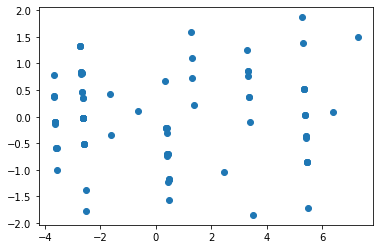

In [31]:
plt.scatter(new_df['pc1'], new_df['pc2'])

In [32]:
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(new_df.values)

In [33]:
lb = kmeans2.labels_

In [34]:
lb

array([1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1], dtype=int32)

In [35]:
centers = kmeans2.cluster_centers_

In [36]:
centers

array([[ 4.37829262,  0.18374309],
       [-2.060373  , -0.08646734]])

In [37]:
out = kmeans2.fit_transform(new_df.values)

In [38]:
final_df = pd.DataFrame(out)

In [39]:
final_df

,0,1
0,8.005398,1.561881
1,8.010260,1.565962
2,1.031989,7.441100
3,1.035213,5.441466
4,8.037180,1.769343
...,...,...
95,4.012553,2.448193
96,1.502085,7.559060
97,1.031989,7.441100
98,7.006076,0.567215


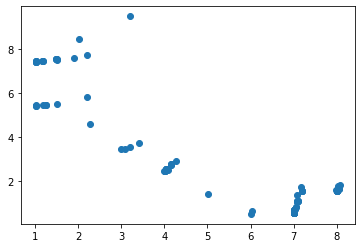

In [40]:
plt.scatter(final_df[0], final_df[1])

In [44]:
pds = kmeans2.predict(new_df.values)

In [45]:
pds.shape

(100,)

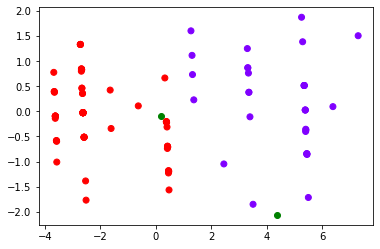

In [46]:
plt.scatter(centers[0], centers[1], color='green')
plt.scatter(new_df['pc1'], new_df['pc2'], c=lb, cmap='rainbow')

# LDA

In [47]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [48]:
import pandas as pd

In [49]:
df = pd.read_csv('/content/Iris.csv')

In [50]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [51]:
X = df[['SepalLengthCm','PetalLengthCm','PetalLengthCm','PetalWidthCm']].values

In [53]:
X

array([[5.1, 1.4, 1.4, 0.2],
       [4.9, 1.4, 1.4, 0.2],
       [4.7, 1.3, 1.3, 0.2],
       [4.6, 1.5, 1.5, 0.2],
       [5. , 1.4, 1.4, 0.2],
       [5.4, 1.7, 1.7, 0.4],
       [4.6, 1.4, 1.4, 0.3],
       [5. , 1.5, 1.5, 0.2],
       [4.4, 1.4, 1.4, 0.2],
       [4.9, 1.5, 1.5, 0.1],
       [5.4, 1.5, 1.5, 0.2],
       [4.8, 1.6, 1.6, 0.2],
       [4.8, 1.4, 1.4, 0.1],
       [4.3, 1.1, 1.1, 0.1],
       [5.8, 1.2, 1.2, 0.2],
       [5.7, 1.5, 1.5, 0.4],
       [5.4, 1.3, 1.3, 0.4],
       [5.1, 1.4, 1.4, 0.3],
       [5.7, 1.7, 1.7, 0.3],
       [5.1, 1.5, 1.5, 0.3],
       [5.4, 1.7, 1.7, 0.2],
       [5.1, 1.5, 1.5, 0.4],
       [4.6, 1. , 1. , 0.2],
       [5.1, 1.7, 1.7, 0.5],
       [4.8, 1.9, 1.9, 0.2],
       [5. , 1.6, 1.6, 0.2],
       [5. , 1.6, 1.6, 0.4],
       [5.2, 1.5, 1.5, 0.2],
       [5.2, 1.4, 1.4, 0.2],
       [4.7, 1.6, 1.6, 0.2],
       [4.8, 1.6, 1.6, 0.2],
       [5.4, 1.5, 1.5, 0.4],
       [5.2, 1.5, 1.5, 0.1],
       [5.5, 1.4, 1.4, 0.2],
       [4.9, 1

In [54]:
clf = LinearDiscriminantAnalysis()

In [65]:
y = df['Species'].values

In [66]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)

In [67]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [69]:
clf.fit(X, y)

LinearDiscriminantAnalysis()

In [72]:
t = clf.fit_transform(X, y)

In [73]:
t

array([[-7.30461464e+00,  2.91019912e-01],
       [-6.99696714e+00, -2.76572364e-02],
       [-6.96086356e+00, -8.50915339e-02],
       [-6.26395195e+00, -7.66915809e-01],
       [-7.15079089e+00,  1.31681338e-01],
       [-6.54226418e+00,  9.23840738e-01],
       [-6.33090090e+00, -3.64061305e-02],
       [-6.87924697e+00, -1.29561513e-01],
       [-6.22784837e+00, -8.24350107e-01],
       [-6.93001819e+00, -7.58166915e-01],
       [-7.49454198e+00,  5.07792783e-01],
       [-6.30005553e+00, -7.09481511e-01],
       [-7.04773836e+00, -6.56262638e-01],
       [-7.09325137e+00, -6.69226957e-01],
       [-8.92446877e+00,  1.92887563e+00],
       [-7.54682329e+00,  1.92434216e+00],
       [-7.62843988e+00,  1.96881214e+00],
       [-7.10001967e+00,  7.60286740e-01],
       [-7.20833041e+00,  9.32589632e-01],
       [-6.82847574e+00,  4.99043889e-01],
       [-6.95145413e+00, -1.46929178e-02],
       [-6.62388077e+00,  9.68310717e-01],
       [-7.62167158e+00,  5.39298444e-01],
       [-5.

In [76]:
import matplotlib.pyplot as plt

In [79]:
new_df = pd.DataFrame(t, columns=['l1','l2'])

In [80]:
new_df

,l1,l2
0,-7.304615,0.291020
1,-6.996967,-0.027657
2,-6.960864,-0.085092
3,-6.263952,-0.766916
4,-7.150791,0.131681
...,...,...
145,4.849369,2.767812
146,4.103196,0.775876
147,4.543232,1.041335
148,6.161576,1.448634


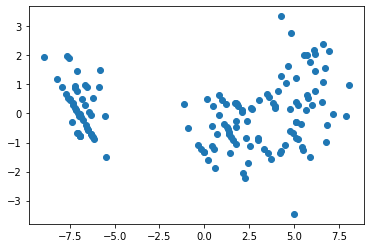

In [82]:
plt.scatter(new_df['l1'], new_df['l2'])

# K means - LDA

In [83]:
from sklearn.cluster import KMeans

In [84]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(new_df.values)

In [85]:
lb = kmeans.labels_

In [86]:
lb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [87]:
centers = kmeans.cluster_centers_

In [88]:
centers

array([[-6.89621041,  0.18052363],
       [ 3.44810521, -0.09026182]])

In [89]:
out = kmeans.fit_transform(new_df.values)

In [90]:
final_df = pd.DataFrame(out)

In [91]:
final_df

,0,1
0,0.423088,10.759478
1,0.231282,10.445260
2,0.273371,10.408970
3,1.139031,9.735600
4,0.259223,10.601220
...,...,...
145,12.027165,3.183100
146,11.015507,1.085974
147,11.471784,1.574742
148,13.119218,3.119474


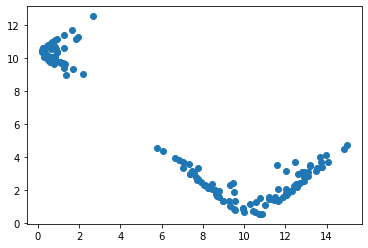

In [92]:
plt.scatter(final_df[0], final_df[1])

In [93]:
pds = kmeans.predict(new_df.values)

In [94]:
pds.shape

(150,)

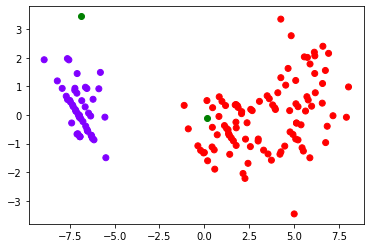

In [96]:
plt.scatter(centers[0], centers[1], color='green')
plt.scatter(new_df['l1'], new_df['l2'], c=lb, cmap='rainbow')

# MakeBlob Data

In [213]:
from sklearn.datasets import make_blobs

In [214]:
X, y = make_blobs(n_samples=100, centers=7, n_features=12, random_state=0)

In [215]:
X

array([[  3.09361241,   9.19643387,  -8.20845383, ...,   6.1068932 ,
         -0.90051971,   5.70453676],
       [ -8.68913995,   3.61866826,  -6.66980392, ...,   1.31807544,
        -10.14172303,   1.37388008],
       [  1.75993757,   5.73934001,  -6.62336653, ...,   8.04766415,
         -0.88095341,   6.63075624],
       ...,
       [  9.19452942,   0.83373748,   2.00791244, ...,   0.30873184,
         -8.21166313,   4.20869154],
       [ -6.83394668,   2.8766806 ,  -7.52816323, ...,   0.40406696,
        -10.40683315,   2.24232064],
       [  1.22494152,   9.64882413,  -8.48155387, ...,   5.30299308,
         -0.10402967,   5.14986374]])

In [216]:
y

array([1, 2, 1, 6, 4, 3, 0, 5, 6, 4, 0, 1, 0, 3, 2, 6, 4, 4, 2, 4, 5, 0,
       2, 1, 1, 5, 4, 0, 2, 0, 3, 5, 1, 6, 4, 4, 1, 6, 2, 2, 1, 4, 2, 1,
       0, 6, 5, 0, 3, 3, 5, 3, 2, 4, 5, 6, 6, 5, 0, 0, 0, 6, 3, 5, 3, 0,
       5, 3, 1, 5, 2, 3, 6, 4, 0, 1, 1, 0, 6, 1, 2, 3, 6, 2, 5, 3, 4, 0,
       5, 1, 5, 4, 3, 3, 4, 6, 2, 6, 2, 1])

In [221]:
clf = LinearDiscriminantAnalysis(n_components = 2)
ldaa = clf.fit_transform(X, y)

In [222]:
ldaa

array([[-25.15641835,   4.78992112],
       [  3.24226788,  19.18337919],
       [-24.3932315 ,   3.37678911],
       [  8.45822889,  -0.99785926],
       [ 16.45053358,  -4.2988638 ],
       [ 12.14557397,   2.24818473],
       [ -7.06301248,   0.73291839],
       [ -4.7979047 , -24.74487044],
       [  5.81771574,   0.6268914 ],
       [ 18.13216705,  -3.52656821],
       [ -6.70258281,  -0.47582814],
       [-24.35893793,   4.90705536],
       [ -9.33650763,   2.14865627],
       [ 12.69319236,   1.79219506],
       [  4.04100383,  18.14943703],
       [  6.70593477,  -0.50605653],
       [ 17.37718185,  -4.14735637],
       [ 17.91301375,  -4.00662237],
       [  3.3798584 ,  18.18706758],
       [ 18.73716059,  -6.84249993],
       [ -4.46824458, -21.71574017],
       [ -7.77660503,   1.37663274],
       [  1.55637624,  19.40865167],
       [-24.52609011,   3.84411936],
       [-26.96597647,   3.37971789],
       [ -2.17016274, -21.83205744],
       [ 15.76145373,  -6.24848067],
 

In [224]:
data = pd.DataFrame(ldaa,columns=['lda1', 'lda2'])

In [225]:
import matplotlib.pyplot as plt

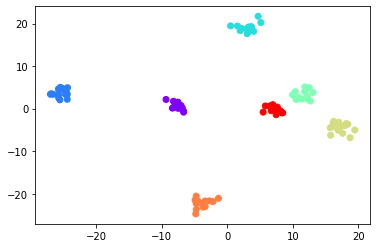

In [231]:
plt.scatter(data['lda1'], data['lda2'], c=y, cmap='rainbow')

# Make_blobs K Means

In [232]:
from sklearn.cluster import KMeans

In [233]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

In [234]:
lb = kmeans.labels_

In [235]:
lb

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [236]:
centers = kmeans.cluster_centers_

In [237]:
centers

array([[-12.48245743,  -5.61763028],
       [  9.80764513,   4.41385236]])

In [238]:
out = kmeans.fit_transform(new_df.values)

In [239]:
final_df = pd.DataFrame(out)

In [240]:
final_df

,0,1
0,2.378507,0.450276
1,1.388378,0.539854
2,2.274617,0.346386
3,2.297704,0.369473
4,1.218945,0.709286
...,...,...
11157,0.853591,1.074640
11158,1.307574,0.620657
11159,0.398317,2.326549
11160,0.085286,2.013517


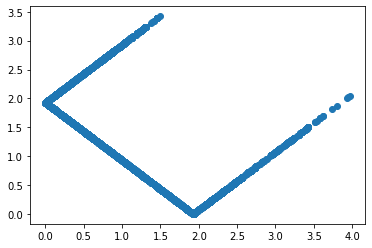

In [241]:
plt.scatter(final_df[0], final_df[1])

In [242]:
pds = kmeans.predict(new_df.values)

In [243]:
pds.shape

(11162,)

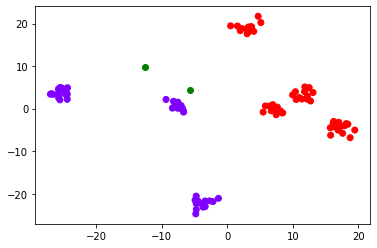

In [246]:
plt.scatter(centers[0], centers[1], color='green')
plt.scatter(data['lda1'], data['lda2'], c=lb, cmap='rainbow')